# DSDJ Technical Workshop | K-NN

## Prima Indians Diabetes Dataset
***

In [1]:
__author__ = "Data Science Dream Job"
__copyright__ = "Copyright 2019, Data Science Dream Job LLC"
__email__ = "info@datasciencedreamjob.com"

## Import Libraries
***

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#importing train_test_split
from sklearn.model_selection import train_test_split

## Import Prima Indians Diabetes Dataset
***

In [2]:
# Import the campaign dataset from Excel (Sheet 0 = Non Responders, Sheet 1 = Responders)
diabetes_df = pd.read_csv("diabetes.csv")

In [3]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Examine Shape of Dataset**

In [4]:
diabetes_df.shape

(768, 9)

**Examine Class Distribution**

In [6]:
diabetes_df.Outcome.value_counts() / len(diabetes_df)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

## Create Seperate Arrays for IVs and DV
***

In [7]:
# Create array to store our features and target variable
X = diabetes_df.drop('Outcome',axis=1).values #independent variable, outcome
y = diabetes_df['Outcome'].values  

## Scale the Data
***

**Apply Standard Scaling**

In [8]:
# Apply Standard Scaler to our X dataset
import sklearn.preprocessing as preproc
X_scaled = preproc.StandardScaler().fit_transform(X)
X_scaled

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

## Train/Test Split
***

**Split our data into a train and test set**

In [9]:
# Apply Train/Test Split , create a model that generalizes the test data, sk learn
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42, stratify=y)

## Import K-NN Classifier 
***

**Let's apply different values of K to evaluate which value should give us the best prediction performance**

We will be using 50 different values of K (1-50)

In [12]:
# Import KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

# Create K values (1-10) & Create Arrays to store train/test performance accuracy
k = np.arange(1,50) # plays with k's from 1 to 50. to compare what is working well and not working well
train_accuracy = np.empty(len(k))
test_accuracy = np.empty(len(k))

for i,k in enumerate(k):
    # Instantiate NN Classifier with K Neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit KNN model
    knn.fit(X_train, y_train)
    
    # Evaluate train performance 
    train_accuracy[i] = knn.score(X_train, y_train)
    
    # Evaluate test performance
    test_accuracy[i] = knn.score(X_test, y_test) 

## Visualize the Train/Test Report
***

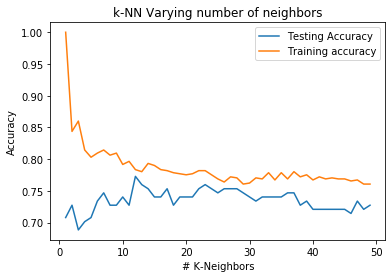

In [13]:
# Visualize Train/Test Performance
k = np.arange(1,50)
plt.title('k-NN Varying number of neighbors')
plt.plot(k, test_accuracy, label='Testing Accuracy')
plt.plot(k, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('# K-Neighbors')
plt.ylabel('Accuracy')
plt.show()

#the higher accuracy the better off the score is.
#the lower of k value is the more chance of overfitting the area. 

#goal of machine learning is to train algoright to train evaluation??

## Apply GridSearchCV
***

It's hard to visually see which value of K is best for our prediction accuracy. 

We'll apply GridSearchCV where:
- For each value of K, we will apply **5-Fold Cross Validation** to it

Specifically:

1. Try different values of K

2. Train/Fit them all seperately 

3. Evaluate each of their performance

4. Select the best score


In [14]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV

#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}

knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5) #applying coross validation of 5, cv=5
knn_cv.fit(X_scaled,y)

#by applying cross validation youre getting a more accurate evaluation of your models. more accurate score to evaluate the models better.


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

## Examine the Best Score 

In [15]:
knn_cv.best_score_

0.7669270833333334

## Examinen the Best K Value

In [16]:
knn_cv.best_params_

{'n_neighbors': 17}